# Requeriments

In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile
import random
#import sklearn.metrics       as Metrics

## Loading data

In [4]:
zip_file = ZipFile('/mnt/workstation/data/Dataton_train.zip')

In [5]:
headers = pd.read_csv(zip_file.open("header.txt"), sep= ",")
headers.columns

Index(['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'tipo_vivienda', 'ult_actual', 'categoria', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'tenencia_tc', 'cuota_tc_bancolombia', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen',
       'cat_ingreso', 'ingreso_final', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota

In [6]:
len(headers.columns)

65

In [7]:
header = list(headers.columns)

In [8]:
type(header)

list

In [9]:
header += 'U1'
header

['periodo',
 'id_cli',
 'fecha_nacimiento',
 'edad',
 'genero',
 'estado_civil',
 'nivel_academico',
 'profesion',
 'ocupacion',
 'tipo_vivienda',
 'ult_actual',
 'categoria',
 'codigo_ciiu',
 'ind_mora_vigente',
 'cartera_castigada',
 'ciudad_residencia',
 'departamento_residencia',
 'ciudad_laboral',
 'departamento_laboral',
 'rechazo_credito',
 'mora_max',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cupo_total_tc',
 'tenencia_tc',
 'cuota_tc_bancolombia',
 'tiene_consumo',
 'tiene_crediagil',
 'nro_tot_cuentas',
 'ctas_activas',
 'tiene_ctas_activas',
 'ctas_embargadas',
 'tiene_ctas_embargadas',
 'pension_fopep',
 'cuota_cred_hipot',
 'tiene_cred_hipo_1',
 'tiene_cred_hipo_2',
 'mediana_nom3',
 'mediana_pen3',
 'ingreso_nompen',
 'cat_ingreso',
 'ingreso_final',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_mora_30_consum_ult_3m_sf',
 'cuota_de_vivienda',
 'cuota_de_consumo',
 'cuota_rotativos',
 'cuota_tarjeta_de_credito',
 'cuota_de_sect

In [10]:
df = pd.read_csv(zip_file.open("Dataton_train.csv"), sep= ",", names =header)
df

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,10,11,12,24,26,29,30,32,38,39,45,46,58,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,U,1
0,201908,2089776,19840630,35.0582,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,311715.5,C,0,\N,1255032,\N,232526,NaN,NaN
1,201909,2089776,19840630,35.1431,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,311715.5,C,0,\N,1255032,\N,265900,NaN,NaN
2,201907,2089776,19840630,34.9624,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,311306,C,0,\N,1255032,\N,243052,NaN,NaN
3,201903,2089776,19840630,34.6393,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,311306,C,0,\N,1172612,\N,276014,NaN,NaN
4,201911,2089776,19840630,35.3073,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0,677516,C,0,\N,1255032,\N,418866,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988743,201910,2090044,19670629,52.2409,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Profesional Independiente,\N,...,0,929800,C,0,\N,\N,\N,25500,NaN,NaN
20988744,202002,2090044,19670629,52.5613,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Profesional Independiente,\N,...,0,41800,D,0,\N,\N,\N,147900,NaN,NaN
20988745,201903,2090044,19670629,51.6441,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Profesional Independiente,\N,...,0,928500,B,0,\N,\N,\N,777437,NaN,NaN
20988746,202001,2090044,19670629,52.4654,F,DIVORCIADO,UNIVERSITARIO,DERECHO,Profesional Independiente,\N,...,0,41800,D,0,\N,\N,\N,1.13101e+06,NaN,NaN


/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 20988748 + 1) instead
  after removing the cwd from sys.path.


Text(199.0, 0.5, 'Filas')

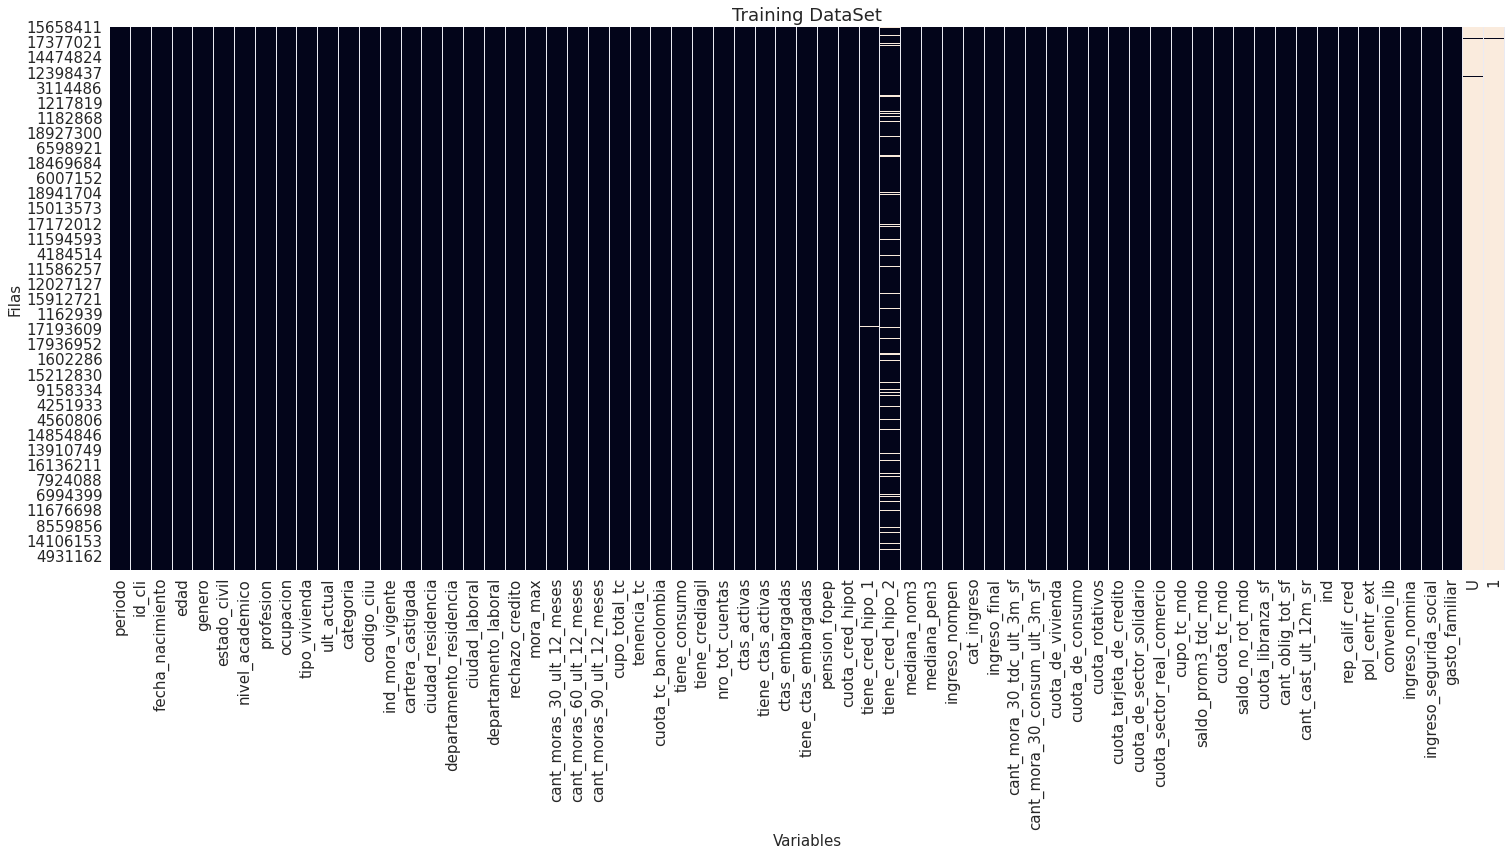

In [18]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
indice = np.sort(np.random.random_integers(0,len(df),2500000))
sns.heatmap(df.iloc[indice,].isnull(), cbar=False)
plt.title("Training DataSet")
plt.xlabel('Variables')
plt.ylabel('Filas')

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 20988748 + 1) instead
  after removing the cwd from sys.path.


Text(199.0, 0.5, 'Filas')

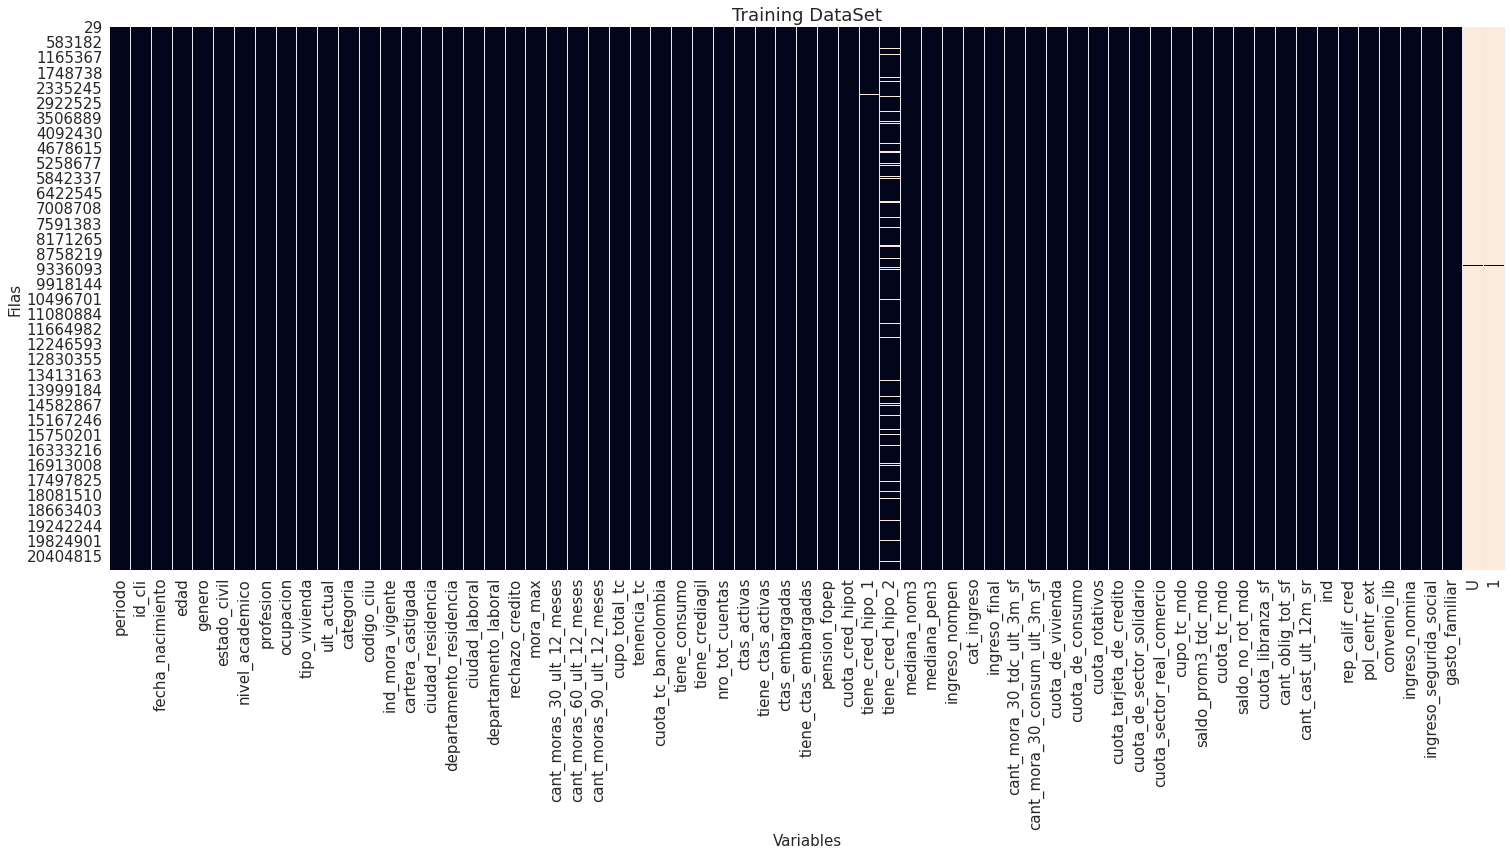

In [19]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
indice = np.sort(np.random.random_integers(0,len(df),2000000))
sns.heatmap(df.iloc[indice,].isnull(), cbar=False)
plt.title("Training DataSet")
plt.xlabel('Variables')
plt.ylabel('Filas')

# Pre processing

In [36]:
input = df['id_cli']
input.drop_duplicates( inplace= True)
input.shape

(1126662,)

In [20]:
df.columns

Index(['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'tipo_vivienda', 'ult_actual', 'categoria', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'tenencia_tc', 'cuota_tc_bancolombia', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen',
       'cat_ingreso', 'ingreso_final', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota

## Variables from -1

In [21]:
df['1'].unique()

array([      nan, 290190.  , 213340.04, ..., 157850.23, 781500.  ,
       846512.  ])

In [23]:
df[df['1']==290190].index

Int64Index([4828], dtype='int64')

In [29]:
len(df[df['1'].isnull()].index)

20941763

In [30]:
len(df[df['1'].notnull()].index)

46985

In [31]:
df['U'].unique()

array([nan, '\\N', '877803', ..., '1519664', '757500', '956913'],
      dtype=object)

In [32]:
df[df['U']==877803].index

Int64Index([5942224], dtype='int64')

In [33]:
len(df[df['U'].isnull()].index)

20899831

In [34]:
len(df[df['U'].notnull()].index)

88917

In [27]:
submission = df[['id_cli','gasto_familiar']].groupby(by=['id_cli']).sum()
submission

,gasto_familiar
id_cli,
3,1.3003e+07
8,18144444222839.152052723322444019233123227601....
12,1077397010773970010773971077397107739710773971...
15,1500004297534225101420002428061342005283401318...
17,3735914919320645786722670172379172367013804551...
...,...
8704791,4228592751217821412406456129959555355067381951...
8704792,156471214021781865826.494946350374142764114388...
8704795,369724.04291205785882.31000000011307043149799....


In [29]:
submission = df[['id_cli','gasto_familiar']]
submission.drop_duplicates(subset =['id_cli'], inplace= True)
submission

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_cli,gasto_familiar
0,2089776,232526
19,2088434,2679975
33,2088089,998342
48,4780572,115950
66,3894402,136811.27
...,...,...
20988653,2892117,111391
20988672,4772894,196700
20988691,4774849,1.53969e+06
20988710,3895049,109861


In [30]:
submission.to_csv('/mnt/workstation/data/submission.csv', index = False, header=True)